In [1]:
from platform import python_version
print(python_version())

3.6.9


In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
tf.random.set_seed(1234)

In [4]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf

from math import sqrt
from numpy.random import seed
seed(1)
from pandas import DataFrame
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM

dtypes = {
        'IsCanceled':                                    'float64',
        }

In [5]:
df = pd.read_csv("H1_dailycancellations.csv", dtype=dtypes)

In [6]:
df

,IsCanceled,ArrivalDateYear,ArrivalDateMonth,ArrivalDateDayOfMonth,Order
0,0.0,2015,7,1,1
1,0.0,2015,7,1,2
2,0.0,2015,7,1,3
3,0.0,2015,7,1,4
4,0.0,2015,7,1,5
...,...,...,...,...,...
40055,0.0,2017,8,31,40056
40056,0.0,2017,8,31,40057
40057,0.0,2017,8,31,40058
40058,0.0,2017,8,31,40059


In [7]:
# https://stackoverflow.com/questions/23836277/add-leading-zeros-to-strings-in-pandas-dataframe
df['ArrivalDateMonth'] = df['ArrivalDateMonth'].apply(lambda x: '{0:0>2}'.format(x))

In [8]:
df['ArrivalDateDayOfMonth'] = df['ArrivalDateDayOfMonth'].apply(lambda x: '{0:0>2}'.format(x))

In [9]:
a=df.head()
b=df
b
c=b.sort_values(['Order'], ascending=True)

In [10]:
df = DataFrame(b, columns= ['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth', 'Order']) 
df

,ArrivalDateYear,ArrivalDateMonth,ArrivalDateDayOfMonth,Order
0,2015,07,01,1
1,2015,07,01,2
2,2015,07,01,3
3,2015,07,01,4
4,2015,07,01,5
...,...,...,...,...
40055,2017,08,31,40056
40056,2017,08,31,40057
40057,2017,08,31,40058
40058,2017,08,31,40059


In [11]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateMonth'].map(str) + df['ArrivalDateDayOfMonth'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0        20150701
1        20150701
2        20150701
3        20150701
4        20150701
           ...   
40055    20170831
40056    20170831
40057    20170831
40058    20170831
40059    20170831
Length: 40060, dtype: object


In [12]:
df2 = DataFrame(b, columns= ['IsCanceled']) 
df2

,IsCanceled
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
40055,0.0
40056,0.0
40057,0.0
40058,0.0


In [13]:
type(df2)

pandas.core.frame.DataFrame

In [14]:
df3=pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'IsCanceled']

In [15]:
df3
df3.sort_values(['FullDate','IsCanceled'], ascending=True)

,FullDate,IsCanceled
0,20150701,0.0
1,20150701,0.0
2,20150701,0.0
3,20150701,0.0
4,20150701,0.0
...,...,...
40014,20170831,1.0
40015,20170831,1.0
40016,20170831,1.0
40017,20170831,1.0


In [16]:
df4 = df3.groupby('FullDate').agg(sum)
df4
df4.sort_values(['FullDate'], ascending=True)

,IsCanceled
FullDate,
20150701,5.0
20150702,9.0
20150703,13.0
20150704,14.0
20150705,8.0
...,...
20170827,21.0
20170828,37.0
20170829,14.0


In [17]:
df4.to_csv("daily cancellations h1.csv", sep='\t', encoding='utf-8')

In [18]:
tseries=df4['IsCanceled']
tseries

FullDate
20150701     5.0
20150702     9.0
20150703    13.0
20150704    14.0
20150705     8.0
            ... 
20170827    21.0
20170828    37.0
20170829    14.0
20170830    14.0
20170831    14.0
Name: IsCanceled, Length: 793, dtype: float64

In [19]:
result = adfuller(tseries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.968735
p-value: 0.001583
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


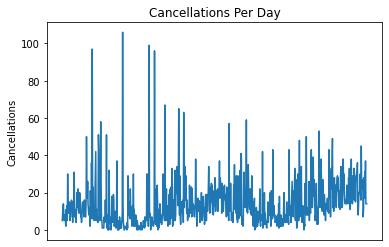

In [20]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Cancellations')
plt.title("Cancellations Per Day")
plt.show()

In [21]:
df=pd.DataFrame(tseries)
df

,IsCanceled
FullDate,
20150701,5.0
20150702,9.0
20150703,13.0
20150704,14.0
20150705,8.0
...,...
20170827,21.0
20170828,37.0
20170829,14.0


In [22]:
df

,IsCanceled
FullDate,
20150701,5.0
20150702,9.0
20150703,13.0
20150704,14.0
20150705,8.0
...,...
20170827,21.0
20170828,37.0
20170829,14.0


In [23]:
df=np.array(df)

In [24]:
np.mean(df)

14.025220680958386

### Training and Validation data partition

In [25]:
train_size = int(len(df) * 0.8)
val_size = len(df) - train_size
train, val = df[0:train_size,:], df[train_size:len(df),:]

### Form dataset matrix

In [26]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [27]:
df

array([[  5.],
       [  9.],
       [ 13.],
       [ 14.],
       [  8.],
       [  5.],
       [  8.],
       [  8.],
       [  6.],
       [  2.],
       [ 11.],
       [  8.],
       [ 13.],
       [  5.],
       [ 30.],
       [ 12.],
       [  9.],
       [ 10.],
       [ 11.],
       [ 15.],
       [  5.],
       [  7.],
       [  7.],
       [ 13.],
       [ 16.],
       [ 11.],
       [ 15.],
       [  4.],
       [ 13.],
       [ 12.],
       [ 15.],
       [ 31.],
       [  7.],
       [ 11.],
       [  9.],
       [  6.],
       [  4.],
       [ 11.],
       [ 20.],
       [ 12.],
       [ 13.],
       [ 22.],
       [ 11.],
       [  9.],
       [  9.],
       [ 20.],
       [ 19.],
       [ 12.],
       [  7.],
       [  7.],
       [  4.],
       [  6.],
       [ 14.],
       [ 15.],
       [ 14.],
       [ 12.],
       [  7.],
       [ 16.],
       [ 16.],
       [  8.],
       [  7.],
       [  7.],
       [ 16.],
       [ 50.],
       [ 25.],
       [ 17.],
       [ 2

## Normalize dataset with MinMaxScaler

In [28]:
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
train

array([[0.04716981],
       [0.08490566],
       [0.12264151],
       [0.13207547],
       [0.0754717 ],
       [0.04716981],
       [0.0754717 ],
       [0.0754717 ],
       [0.05660377],
       [0.01886792],
       [0.10377358],
       [0.0754717 ],
       [0.12264151],
       [0.04716981],
       [0.28301887],
       [0.11320755],
       [0.08490566],
       [0.09433962],
       [0.10377358],
       [0.14150943],
       [0.04716981],
       [0.06603774],
       [0.06603774],
       [0.12264151],
       [0.1509434 ],
       [0.10377358],
       [0.14150943],
       [0.03773585],
       [0.12264151],
       [0.11320755],
       [0.14150943],
       [0.29245283],
       [0.06603774],
       [0.10377358],
       [0.08490566],
       [0.05660377],
       [0.03773585],
       [0.10377358],
       [0.18867925],
       [0.11320755],
       [0.12264151],
       [0.20754717],
       [0.10377358],
       [0.08490566],
       [0.08490566],
       [0.18867925],
       [0.17924528],
       [0.113

In [29]:
val = scaler.fit_transform(val)
val

array([[0.1 ],
       [0.94],
       [0.14],
       [0.1 ],
       [0.12],
       [0.18],
       [0.1 ],
       [0.1 ],
       [0.46],
       [0.04],
       [0.22],
       [0.2 ],
       [0.12],
       [0.62],
       [0.8 ],
       [0.26],
       [0.18],
       [0.18],
       [0.72],
       [0.72],
       [0.3 ],
       [0.48],
       [0.32],
       [0.16],
       [0.04],
       [0.1 ],
       [0.12],
       [0.44],
       [0.12],
       [0.  ],
       [0.18],
       [0.  ],
       [0.16],
       [0.24],
       [1.  ],
       [0.56],
       [0.2 ],
       [0.18],
       [0.56],
       [0.7 ],
       [0.56],
       [0.16],
       [0.14],
       [0.2 ],
       [0.48],
       [0.26],
       [0.2 ],
       [0.1 ],
       [0.32],
       [0.22],
       [0.1 ],
       [0.04],
       [0.22],
       [0.18],
       [0.16],
       [0.24],
       [0.28],
       [0.14],
       [0.16],
       [0.12],
       [0.8 ],
       [0.28],
       [0.4 ],
       [0.56],
       [0.08],
       [0.4 ],
       [0.

In [30]:
# Lookback period
lookback = 5
X_train, Y_train = create_dataset(train, lookback)
X_val, Y_val = create_dataset(val, lookback)

In [31]:
X_train

array([[0.04716981, 0.08490566, 0.12264151, 0.13207547, 0.0754717 ],
       [0.08490566, 0.12264151, 0.13207547, 0.0754717 , 0.04716981],
       [0.12264151, 0.13207547, 0.0754717 , 0.04716981, 0.0754717 ],
       ...,
       [0.05660377, 0.12264151, 0.05660377, 0.03773585, 0.        ],
       [0.12264151, 0.05660377, 0.03773585, 0.        , 0.02830189],
       [0.05660377, 0.03773585, 0.        , 0.02830189, 0.01886792]])

In [32]:
Y_train

array([0.04716981, 0.0754717 , 0.0754717 , 0.05660377, 0.01886792,
       0.10377358, 0.0754717 , 0.12264151, 0.04716981, 0.28301887,
       0.11320755, 0.08490566, 0.09433962, 0.10377358, 0.14150943,
       0.04716981, 0.06603774, 0.06603774, 0.12264151, 0.1509434 ,
       0.10377358, 0.14150943, 0.03773585, 0.12264151, 0.11320755,
       0.14150943, 0.29245283, 0.06603774, 0.10377358, 0.08490566,
       0.05660377, 0.03773585, 0.10377358, 0.18867925, 0.11320755,
       0.12264151, 0.20754717, 0.10377358, 0.08490566, 0.08490566,
       0.18867925, 0.17924528, 0.11320755, 0.06603774, 0.06603774,
       0.03773585, 0.05660377, 0.13207547, 0.14150943, 0.13207547,
       0.11320755, 0.06603774, 0.1509434 , 0.1509434 , 0.0754717 ,
       0.06603774, 0.06603774, 0.1509434 , 0.47169811, 0.23584906,
       0.16037736, 0.24528302, 0.13207547, 0.10377358, 0.0754717 ,
       0.0754717 , 0.11320755, 0.01886792, 0.19811321, 0.09433962,
       0.05660377, 0.33962264, 0.0754717 , 0.91509434, 0.05660

## Configure LSTM model

Epoch 1/100
502/502 - 1s - loss: 0.0158 - val_loss: 0.0082
Epoch 2/100
502/502 - 0s - loss: 0.0155 - val_loss: 0.0079
Epoch 3/100
502/502 - 0s - loss: 0.0155 - val_loss: 0.0087
Epoch 4/100
502/502 - 0s - loss: 0.0153 - val_loss: 0.0095
Epoch 5/100
502/502 - 0s - loss: 0.0154 - val_loss: 0.0087
Epoch 6/100
502/502 - 0s - loss: 0.0154 - val_loss: 0.0086
Epoch 7/100
502/502 - 0s - loss: 0.0154 - val_loss: 0.0081
Epoch 8/100
502/502 - 0s - loss: 0.0152 - val_loss: 0.0093
Epoch 9/100
502/502 - 0s - loss: 0.0150 - val_loss: 0.0080
Epoch 10/100
502/502 - 0s - loss: 0.0153 - val_loss: 0.0084
Epoch 11/100
502/502 - 0s - loss: 0.0151 - val_loss: 0.0084
Epoch 12/100
502/502 - 0s - loss: 0.0152 - val_loss: 0.0090
Epoch 13/100
502/502 - 1s - loss: 0.0149 - val_loss: 0.0097
Epoch 14/100
502/502 - 1s - loss: 0.0152 - val_loss: 0.0084
Epoch 15/100
502/502 - 1s - loss: 0.0151 - val_loss: 0.0081
Epoch 16/100
502/502 - 1s - loss: 0.0150 - val_loss: 0.0083
Epoch 17/100
502/502 - 1s - loss: 0.0151 - val_lo

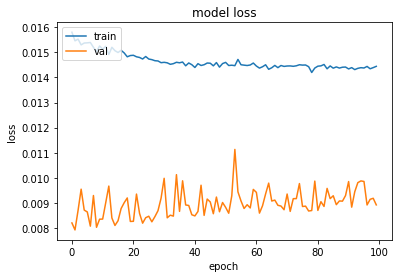

In [33]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(32, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=1, verbose=2)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [34]:
# Generate predictions
trainpred = model.predict(X_train)
valpred = model.predict(X_val)

In [35]:
trainpred

array([[ 0.10549636],
       [ 0.09386575],
       [ 0.10489308],
       [ 0.11370874],
       [ 0.09786562],
       [ 0.07358004],
       [ 0.10260728],
       [ 0.10751283],
       [ 0.11515009],
       [ 0.08892441],
       [ 0.15756017],
       [ 0.13240215],
       [ 0.11827372],
       [ 0.09552954],
       [ 0.14726672],
       [ 0.13474077],
       [ 0.10598265],
       [ 0.0978069 ],
       [ 0.10054992],
       [ 0.13201542],
       [ 0.12320849],
       [ 0.11973933],
       [ 0.12146842],
       [ 0.10740443],
       [ 0.12708664],
       [ 0.12480418],
       [ 0.14309685],
       [ 0.13858859],
       [ 0.13267541],
       [ 0.11215661],
       [ 0.11400646],
       [ 0.12677342],
       [ 0.08338654],
       [ 0.11177136],
       [ 0.14014336],
       [ 0.12378429],
       [ 0.1109708 ],
       [ 0.14486772],
       [ 0.14730531],
       [ 0.11557187],
       [ 0.11188845],
       [ 0.16548118],
       [ 0.14707956],
       [ 0.12712573],
       [ 0.10391845],
       [ 0

In [36]:
valpred

array([[ 0.07469616],
       [ 0.14874375],
       [ 0.13602044],
       [ 0.11758347],
       [ 0.17380431],
       [ 0.1414391 ],
       [ 0.12381872],
       [ 0.13938323],
       [ 0.17215034],
       [ 0.12466678],
       [ 0.09665871],
       [ 0.10601538],
       [ 0.09415892],
       [ 0.1697169 ],
       [ 0.3577997 ],
       [ 0.10284525],
       [ 0.1025369 ],
       [ 0.12528819],
       [ 0.22841644],
       [ 0.16794306],
       [ 0.11355763],
       [ 0.13483196],
       [ 0.15617827],
       [ 0.19119751],
       [ 0.1252971 ],
       [ 0.078452  ],
       [ 0.11297017],
       [ 0.10746892],
       [ 0.13086191],
       [ 0.12189601],
       [ 0.10785256],
       [-0.00142045],
       [ 0.08443516],
       [ 0.11516581],
       [ 0.3370101 ],
       [ 0.22535068],
       [ 0.09424851],
       [ 0.12399653],
       [ 0.13871768],
       [ 0.18686128],
       [ 0.28717393],
       [ 0.15473452],
       [ 0.13809088],
       [ 0.13179779],
       [ 0.23854253],
       [ 0

In [37]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
valpred = scaler.inverse_transform(valpred)
Y_val = scaler.inverse_transform([Y_val])
predictions = valpred

In [38]:
Y_train.shape

(1, 628)

In [39]:
Y_val.shape

(1, 153)

In [40]:
X_train.shape

(628, 1, 5)

In [41]:
X_val.shape

(153, 1, 5)

In [42]:
Y_train

array([[ 5.35849057,  6.77358491,  6.77358491,  5.83018868,  3.94339623,
         8.18867925,  6.77358491,  9.13207547,  5.35849057, 17.1509434 ,
         8.66037736,  7.24528302,  7.71698113,  8.18867925, 10.0754717 ,
         5.35849057,  6.30188679,  6.30188679,  9.13207547, 10.54716981,
         8.18867925, 10.0754717 ,  4.88679245,  9.13207547,  8.66037736,
        10.0754717 , 17.62264151,  6.30188679,  8.18867925,  7.24528302,
         5.83018868,  4.88679245,  8.18867925, 12.43396226,  8.66037736,
         9.13207547, 13.37735849,  8.18867925,  7.24528302,  7.24528302,
        12.43396226, 11.96226415,  8.66037736,  6.30188679,  6.30188679,
         4.88679245,  5.83018868,  9.60377358, 10.0754717 ,  9.60377358,
         8.66037736,  6.30188679, 10.54716981, 10.54716981,  6.77358491,
         6.30188679,  6.30188679, 10.54716981, 26.58490566, 14.79245283,
        11.01886792, 15.26415094,  9.60377358,  8.18867925,  6.77358491,
         6.77358491,  8.66037736,  3.94339623, 12.9

In [43]:
Y_val

array([[12.,  8.,  8., 26.,  5., 14., 13.,  9., 34., 43., 16., 12., 12.,
        39., 39., 18., 27., 19., 11.,  5.,  8.,  9., 25.,  9.,  3., 12.,
         3., 11., 15., 53., 31., 13., 12., 31., 38., 31., 11., 10., 13.,
        27., 16., 13.,  8., 19., 14.,  8.,  5., 14., 12., 11., 15., 17.,
        10., 11.,  9., 43., 17., 23., 31.,  7., 23., 33., 22., 37., 49.,
        12., 19., 10., 11., 28., 20., 17., 24., 17., 12., 22., 27., 29.,
        21., 28., 18., 12., 12., 21., 11., 29., 34., 29., 12., 12., 13.,
        23., 38., 23., 30., 19., 15., 14., 14., 16., 14., 21., 24., 19.,
        14., 19., 28., 21., 33., 17., 11., 15., 15., 38., 17., 29., 14.,
        23., 17., 24., 33., 16., 29., 28., 15., 25., 29., 31., 31., 36.,
        10.,  8., 15., 20., 20., 21., 30., 20., 16., 45., 23., 27., 22.,
        26.,  7., 12., 28., 17., 31., 21., 37., 14., 14.]])

In [44]:
X_train

array([[[0.04716981, 0.08490566, 0.12264151, 0.13207547, 0.0754717 ]],

       [[0.08490566, 0.12264151, 0.13207547, 0.0754717 , 0.04716981]],

       [[0.12264151, 0.13207547, 0.0754717 , 0.04716981, 0.0754717 ]],

       ...,

       [[0.05660377, 0.12264151, 0.05660377, 0.03773585, 0.        ]],

       [[0.12264151, 0.05660377, 0.03773585, 0.        , 0.02830189]],

       [[0.05660377, 0.03773585, 0.        , 0.02830189, 0.01886792]]])

In [45]:
X_val

array([[[0.1 , 0.94, 0.14, 0.1 , 0.12]],

       [[0.94, 0.14, 0.1 , 0.12, 0.18]],

       [[0.14, 0.1 , 0.12, 0.18, 0.1 ]],

       [[0.1 , 0.12, 0.18, 0.1 , 0.1 ]],

       [[0.12, 0.18, 0.1 , 0.1 , 0.46]],

       [[0.18, 0.1 , 0.1 , 0.46, 0.04]],

       [[0.1 , 0.1 , 0.46, 0.04, 0.22]],

       [[0.1 , 0.46, 0.04, 0.22, 0.2 ]],

       [[0.46, 0.04, 0.22, 0.2 , 0.12]],

       [[0.04, 0.22, 0.2 , 0.12, 0.62]],

       [[0.22, 0.2 , 0.12, 0.62, 0.8 ]],

       [[0.2 , 0.12, 0.62, 0.8 , 0.26]],

       [[0.12, 0.62, 0.8 , 0.26, 0.18]],

       [[0.62, 0.8 , 0.26, 0.18, 0.18]],

       [[0.8 , 0.26, 0.18, 0.18, 0.72]],

       [[0.26, 0.18, 0.18, 0.72, 0.72]],

       [[0.18, 0.18, 0.72, 0.72, 0.3 ]],

       [[0.18, 0.72, 0.72, 0.3 , 0.48]],

       [[0.72, 0.72, 0.3 , 0.48, 0.32]],

       [[0.72, 0.3 , 0.48, 0.32, 0.16]],

       [[0.3 , 0.48, 0.32, 0.16, 0.04]],

       [[0.48, 0.32, 0.16, 0.04, 0.1 ]],

       [[0.32, 0.16, 0.04, 0.1 , 0.12]],

       [[0.16, 0.04, 0.1 , 0.12, 0

In [46]:
# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_val[0], valpred[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))

Train Score: 5.74 RMSE
Validation Score: 13.16 RMSE


In [47]:
# Train predictions
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[lookback:len(trainpred)+lookback, :] = trainpred

In [48]:
# Validation predictions
valpredPlot = np.empty_like(df)
valpredPlot[:, :] = np.nan
valpredPlot[len(trainpred)+(lookback*2)+1:len(df)-1, :] = valpred

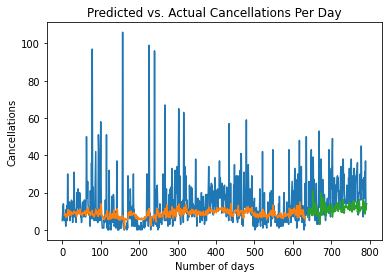

In [49]:
# Plot all predictions
inversetransform, =plt.plot(df)
trainpred, =plt.plot(trainpredPlot)
valpred, =plt.plot(valpredPlot)
plt.xlabel('Number of days')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Day")
plt.show()

In [50]:
Y_val=Y_val.reshape(-1)
Y_val.shape
Y_val=pd.Series(Y_val)

In [51]:
Y_val

0      12.0
1       8.0
2       8.0
3      26.0
4       5.0
       ... 
148    31.0
149    21.0
150    37.0
151    14.0
152    14.0
Length: 153, dtype: float64

In [52]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)

In [53]:
predictions

0       6.734808
1      10.437187
2       9.801022
3       8.879173
4      11.690216
         ...    
148    13.440962
149     8.507638
150    10.403683
151    13.932408
152    10.923871
Length: 153, dtype: float32

In [54]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [55]:
mda(Y_val, predictions)

0.9869281045751634

In [56]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

mse = mean_squared_error(Y_val, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 13.161457


In [57]:
forecast_error = (predictions-Y_val)
forecast_error

0      -5.265192
1       2.437187
2       1.801022
3     -17.120827
4       6.690216
         ...    
148   -17.559038
149   -12.492362
150   -26.596317
151    -0.067592
152    -3.076129
Length: 153, dtype: float64

In [58]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-8.761416673660278

In [59]:
mae = mean_absolute_error(Y_val, predictions)
mae

9.82599094646429

In [60]:
np.mean(Y_val)

20.026143790849673

In [61]:
X_train

array([[[0.04716981, 0.08490566, 0.12264151, 0.13207547, 0.0754717 ]],

       [[0.08490566, 0.12264151, 0.13207547, 0.0754717 , 0.04716981]],

       [[0.12264151, 0.13207547, 0.0754717 , 0.04716981, 0.0754717 ]],

       ...,

       [[0.05660377, 0.12264151, 0.05660377, 0.03773585, 0.        ]],

       [[0.12264151, 0.05660377, 0.03773585, 0.        , 0.02830189]],

       [[0.05660377, 0.03773585, 0.        , 0.02830189, 0.01886792]]])

In [62]:
X_train.shape

(628, 1, 5)